In [1]:
# Standard library
import datetime as dt
import random

from matplotlib import pyplot as plt

import os

from gfactor.spec_ops import gfactortools as gft

In [2]:
os.chdir("/home/blight25/projects/gfactor")
os.getcwd()

'/home/blight25/projects/gfactor'

In [3]:
""" STITCHING TEST """

# Load nrl from random directory
nrl_high_res, nrl_low_res = gft.load_lisird(lisird_dataset="NRL", lisird_dir="./spectra", query_date="2019-12-19")

high_res_waves = nrl_high_res["wavelength (A)"].values
high_res_flux = nrl_high_res["irradiance (W/m^2/A)"].values

low_res_waves_full = nrl_low_res["wavelength (A)"].values
low_res_waves = low_res_waves_full[low_res_waves_full <= 10000]
low_res_flux_full = nrl_low_res["irradiance (W/m^2/A)"].values
low_res_flux = low_res_flux_full[low_res_waves_full <= 10000]

lisird_spectrum, stitch_points = gft.stitch_right(high_res_waves, high_res_flux, low_res_waves, low_res_flux,
                                                  coverage=.10, diff_percent=.05, return_stitch_points=True)

In [4]:
high_res_waves[-1], low_res_waves[-1], max(high_res_flux)

(np.float64(4995.0905999999995),
 np.float64(9975.0),
 np.float64(0.22123169898986816))

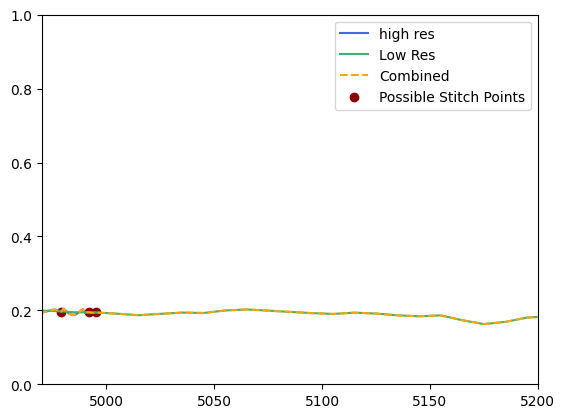

In [5]:
plt.plot(high_res_waves, high_res_flux, label="high res", color="royalblue")
plt.plot(low_res_waves, low_res_flux, label="Low Res", color="mediumseagreen")
plt.plot(lisird_spectrum[0], lisird_spectrum[1], label="Combined", color="orange", linestyle="--")
plt.scatter(stitch_points[0], stitch_points[1], label="Possible Stitch Points", color="darkred")
plt.xlim(4970, 5200)
plt.ylim(0, 1)
plt.legend()
plt.show()

In [6]:
stitch_points[0]

array([4036.0321, 4095.0357, 4119.0372, 4148.0389, 4172.0404, 4258.0457,
       4285.0473, 4287.0474, 4360.0519, 4403.0545, 4415.0552, 4428.056 ,
       4429.0561, 4440.0568, 4441.0568, 4454.0576, 4464.0582, 4479.0591,
       4499.0604, 4503.0606, 4514.0613, 4546.0632, 4579.0652, 4614.0674,
       4622.0679, 4623.0679, 4640.069 , 4665.0705, 4715.0735, 4734.0747,
       4744.0753, 4773.0771, 4774.0771, 4801.0788, 4802.0789, 4803.0789,
       4806.0791, 4829.0805, 4830.0806, 4834.0808, 4838.0811, 4903.085 ,
       4905.0851, 4935.087 , 4943.0875, 4962.0886, 4979.0897, 4992.0905,
       4995.0906])

In [7]:
high_res_waves[-1]

np.float64(4995.0905999999995)